# Neighborhood and Venues Data Analysis of Vancouver

## A. Introduction/Business Problem

### A.1. Description of the problem and a discussion of the background

Vancouver is a coastal seaport city in western Canada, located in the Lower Mainland region of British Columbia. As the most populous city in the province, the 2016 census recorded 631,486 people in the city, up from 603,502 in 2011. The Greater Vancouver area had a population of 2,463,431 in 2016, making it the third-largest metropolitan area in Canada. Vancouver has the highest population density in Canada, with over 5,400 people per square kilometer, which makes it the fifth-most densely populated city with over 250,000 residents in North America.Vancouver has been called a "city of neighborhoods. Each neighborhood in Vancouver has a distinct character and ethnic mix.

In this project, we will try to find an optimal location for a Cofee Shop. Specifically, this report will be targeted to investors interested in opening a Coffee Shop in Vancouver, Canada.

Since there are lots of cafes in Vancouver we will try to detect locations that are more crowded with coffee shops and well-known places for coffee lovers. Also, we will check each Borough through the number of universities and colleges due to the fact that college and university students are the potential target market for cafes.


## B. Data 
### B.1. Data Description

According to the problems we need to obtain following information :

* We need a list of all $Boroughs$ and $Neighborhoods$ of Vancouver with $latitude$ and $longitude$ information. 
 * To obtain this information we use web scraping technique from several sources such as Wikipedia .
 
 
* **Forsquare API** to explore the neighbors of Vancouver and segment them by type of most common running businesses .


* Coordinate of Vancouver center and neighbors will be obtained using **GeoPy**.  

### B.2. Data collection
##### Getting list of neighborhoods in Vancouver 

Firstly, we need to obtain a list of all official neighbors in Vancouver, which is available on Wikipedia.     
Web Scraping method is utilized here to achieve this goal.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.pyplot as plt
%matplotlib inline

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library



Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    sci

In [2]:
!pip install beautifulsoup4
from urllib.request import urlopen
from bs4 import BeautifulSoup


     |████████████████████████████████| 112kB 4.8MB/s eta 0:00:01


In [3]:
url = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Vancouver"
html = urlopen(url)
source = requests.get(url)
soup = BeautifulSoup(html, "html5lib")

table = soup.find( 'div' ,  class_ = "mw-parser-output" )
#print(table.prettify())


Extract a list of Neighborhoods :

In [4]:
neigh_list = []
for ul in table.find_all('ul'):
    row = ""
    for li in ul.find_all('li'):
        neigh = li.text 
        neigh_list.append(neigh)
        
neigh = neigh_list[8:30]          
neigh[0] = 'Arbutus-Ridge'
neigh[20] = 'West End'
neigh

['Arbutus-Ridge',
 'Downtown',
 'Dunbar-Southlands',
 'Fairview',
 'Grandview-Woodland',
 'Hastings-Sunrise',
 'Kensington-Cedar Cottage',
 'Kerrisdale',
 'Killarney',
 'Kitsilano',
 'Marpole',
 'Mount Pleasant',
 'Oakridge',
 'Renfrew-Collingwood',
 'Riley Park',
 'Shaughnessy',
 'South Cambie',
 'Strathcona',
 'Sunset',
 'Victoria-Fraserview',
 'West End',
 'West Point Grey']

In [6]:
lat=[]
lng=[]
for n in list(range(0,len(neigh))) :

    address = '{} , Vancouver, Canada'.format(neigh[n])

    geolocator = Nominatim(user_agent="ca_explorer")
    location = geolocator.geocode(address)
    lat.append(location.latitude)
    lng.append(location.longitude)


Merge all data to one dataframe :

In [7]:
df_vancouver= pd.DataFrame({'Neighborhood': neigh,
                   'Latitude' : lat,
                   'Longitude' : lng})
df_vancouver

,Neighborhood,Latitude,Longitude
0,Arbutus-Ridge,49.240968,-123.167001
1,Downtown,49.283393,-123.117456
2,Dunbar-Southlands,49.253460,-123.185044
3,Fairview,49.264113,-123.126835
4,Grandview-Woodland,49.270559,-123.067942
5,Hastings-Sunrise,49.277594,-123.043920
6,Kensington-Cedar Cottage,49.247632,-123.084207
7,Kerrisdale,49.234673,-123.155389
8,Killarney,49.224274,-123.046250
9,Kitsilano,49.269410,-123.155267


Visualizing Neighborhood of Vancouver using $Folium$  :

In [8]:
geolocator = Nominatim(user_agent="ca_explorer")
va_loc = geolocator.geocode('Vancouver, Canada')
# create map of New York using latitude and longitude values
map_vancouver = folium.Map(location=[va_loc.latitude, va_loc.longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_vancouver['Latitude'], df_vancouver['Longitude'], df_vancouver['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)  
    
map_vancouver

### Foursquare

Now that we have our location, let's use $Foursquare API$ to get info on coffee shops in each neighborhood with the limit as<p><em><strong>100 venue</strong> and the <em><strong>radius 1000 meter</strong> .

We're interested in venues in Coffee Shop, Cafeteria , Cafe etc. categories. So we will include in out list only venues that have 'coffee'  or 'cafe' in category name.

###### Category IDs corresponding to Italian restaurants were taken from Foursquare web site (https://developer.foursquare.com/docs/resources/categories):



* 4bf58dd8d48988d1f9941735 Food & Drink Shop
 * 4bf58dd8d48988d1e0931735 Coffee Shop

 * 4bf58dd8d48988d128941735 Cafeteria

 * 4bf58dd8d48988d16d941735 Cafe

 * 5665c7b9498e7d8a4f2c0f06 Corporate Coffee Shop

In [35]:
CLIENT_ID = 'HGHGYLHS4HBPNHH3OBIFY5WPNPXQCRKVQCDWYJK13MWP2F1E' # your Foursquare ID
#'HGHGYLHS4HBPNHH3OBIFY5WPNPXQCRKVQCDWYJK13MWP2F1E'
#'HUWPD5CQRGYRKTILP0F0JQLE2BZ1KMAAMXQCI3BQAXJQ3GBG
CLIENT_SECRET = 'EZ2LBA0GUF0PN4PVSUXXOKXPKJOFVUCFA5CCYNBFHS5YZAML' # your Foursquare Secret
#'AG3RQ0MOKOMNV5PNHWK3YM0K4RAYCP04DYXMBDNXMH3O2UFV'
#'EZ2LBA0GUF0PN4PVSUXXOKXPKJOFVUCFA5CCYNBFHS5YZAML'
VERSION = '20180605' # Foursquare API version
CATEGORIES = ['4bf58dd8d48988d1f9941735','4bf58dd8d48988d1e0931735','4bf58dd8d48988d128941735',
              '4bf58dd8d48988d16d941735','5665c7b9498e7d8a4f2c0f06' ]
RADIUS = '1000'
LIMIT = '100'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HGHGYLHS4HBPNHH3OBIFY5WPNPXQCRKVQCDWYJK13MWP2F1E
CLIENT_SECRET:EZ2LBA0GUF0PN4PVSUXXOKXPKJOFVUCFA5CCYNBFHS5YZAML




Getting the data of the first neighborhood (Arbutus ridge) to get familiar with the data structure of API :

In [9]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                '49.240968', 
                '-123.167001',
                CATEGORIES[0],
                RADIUS, 
                LIMIT)
results = requests.get(url).json()
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON
nearby_venues.head()


,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,...,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4d4221f933268cfa4bcd5501-0,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",4d4221f933268cfa4bcd5501,NaN,CA,Vancouver,Canada,NaN,...,"[Vancouver BC, Canada]","[{'label': 'display', 'lat': 49.23790227946922...",49.237902,-123.170949,NaN,BC,The Heights Market,0,[],NaN
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4c33740bed37a59384616d03-1,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",4c33740bed37a59384616d03,2363 West 41st Avenue,CA,Vancouver,Canada,NaN,...,"[2363 West 41st Avenue, Vancouver BC, Canada]","[{'label': 'display', 'lat': 49.23564792597063...",49.235648,-123.161906,NaN,BC,Kerrisdale Natural Market,0,[],NaN
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4daf5a6443a1e3d9e6446e65-2,"[{'id': '4bf58dd8d48988d186941735', 'name': 'L...",4daf5a6443a1e3d9e6446e65,5503 West Boulevard,CA,Vancouver,Canada,at 39th Ave W,...,"[5503 West Boulevard (at 39th Ave W), Vancouve...","[{'label': 'display', 'lat': 49.23639807525972...",49.236398,-123.155709,V6M 3W6,BC,West Coast Liquor Store,0,[],153877561
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4e3d9b2ba809ba757c0c96e7-3,"[{'id': '4bf58dd8d48988d1fa941735', 'name': 'F...",4e3d9b2ba809ba757c0c96e7,E Blvd.,CA,Vancouver,Canada,btwn 37th & 41st Ave.,...,"[E Blvd. (btwn 37th & 41st Ave.), Vancouver BC...","[{'label': 'display', 'lat': 49.23663459211686...",49.236635,-123.155015,NaN,BC,Kerrisdale Village Farmers Market,0,[],NaN


In [9]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### B.3. Data Cleaning & Preparation
Let's keep and clean only needed data

In [11]:

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng' , 'venue.location.address']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng,address
0,The Heights Market,Grocery Store,49.237902,-123.170949,NaN
1,Kerrisdale Natural Market,Grocery Store,49.235648,-123.161906,2363 West 41st Avenue
2,West Coast Liquor Store,Liquor Store,49.236398,-123.155709,5503 West Boulevard
3,Kerrisdale Village Farmers Market,Farmers Market,49.236635,-123.155015,E Blvd.


Now we almost know what we want from API , Let's do these steps for all Neighbors and all categories :

In [10]:
def getNearbyVenues(names,categories, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for cat in categories :
        for name, lat, lng in zip(names, latitudes, longitudes):
            #print(name)
            #print(cat)
               # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng,
                cat,
                RADIUS, 
                LIMIT)
            
              # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
         # return only relevant information for each nearby venue
            try:
                venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'],
                v['venue']['location']['formattedAddress'][0],   
                #' '.join(v['venue']['location']['address'].split(" ")[1:]),
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
            except:
                venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'],
                'Not Available',
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
            
 
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Name', 
                  'Venue Name',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
     
        
    
    return(nearby_venues)

In [37]:
df_neighbors = getNearbyVenues(df_vancouver['Neighborhood'],CATEGORIES , df_vancouver['Latitude'], df_vancouver['Longitude'] )
#df_neighbors= pd.read_csv('df_neighbors.csv')
#with open('df_neighbors.csv' , 'w') :
#      df_neighbors.to_csv('df_neighbors.csv')
print(df_neighbors.shape)

(1255, 8)


In [39]:
#df_neighbors.drop( 'Unnamed: 0' , 1 , inplace=True)
df_neighbors.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Name,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,Arbutus-Ridge,49.240968,-123.167001,The Heights Market,Vancouver BC,49.237902,-123.170949,Grocery Store
1,Arbutus-Ridge,49.240968,-123.167001,Kerrisdale Natural Market,2363 West 41st Avenue,49.235648,-123.161906,Grocery Store
2,Arbutus-Ridge,49.240968,-123.167001,West Coast Liquor Store,5503 West Boulevard (at 39th Ave W),49.236398,-123.155709,Liquor Store
3,Arbutus-Ridge,49.240968,-123.167001,Kerrisdale Village Farmers Market,E Blvd. (btwn 37th & 41st Ave.),49.236635,-123.155015,Farmers Market
4,Downtown,49.283393,-123.117456,Pourhouse,162 Water St (btwn Cambie & Abbott),49.284222,-123.108330,Restaurant


What are the unique categories in our data set ?

In [40]:
df_neighbors['Venue Category'].unique()

array(['Grocery Store', 'Liquor Store', 'Farmers Market', 'Restaurant',
       'Breakfast Spot', 'Café', 'Food & Drink Shop', 'Supermarket',
       'Lounge', 'Italian Restaurant', 'Miscellaneous Shop', 'Pharmacy',
       'French Restaurant', 'Trade School', 'Health Food Store',
       'Wine Shop', 'Cocktail Bar', 'Diner', 'Coffee Shop', 'Pub',
       'Deli / Bodega', 'Gourmet Shop', 'Supplement Shop', 'Food Service',
       'Japanese Restaurant', 'Indian Restaurant',
       'Street Food Gathering', 'Sushi Restaurant', 'Sandwich Place',
       'Butcher', 'Beer Store', 'Cheese Shop', 'Seafood Restaurant',
       'Fish Market', 'Brewery', 'Convenience Store', 'Organic Grocery',
       'Fast Food Restaurant', 'Tea Room', 'Park', 'Bakery', 'Bar',
       'Greek Restaurant', 'Cafeteria', 'Office', 'College Cafeteria',
       'Dessert Shop', 'American Restaurant', 'Chinese Restaurant',
       'Ice Cream Shop', 'Asian Restaurant', 'Snack Place'], dtype=object)

In [41]:
#we can filter our result to only coffee shops and related stores 

required = ('Café', 'Food & Drink Shop' ,'Lounge',
            'Coffee Shop', 'Tea Room','Cafeteria','College Cafeteria')

df_neighbors = df_neighbors[df_neighbors['Venue Category'].isin(required) ]
print(df_neighbors.shape)


(929, 8)


##### Group by Neighborhoods
Here we group by data frame by Neighborhood to find out in each how many stores placed in 
each neighbor. 

In [42]:
df_neighbors.groupby('Neighborhood').count().sort_values("Name", ascending = False).reset_index().head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Name,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,Downtown,209,209,209,209,209,209,209
1,West End,199,199,199,199,199,199,199
2,Fairview,74,74,74,74,74,74,74
3,Kitsilano,64,64,64,64,64,64,64
4,Mount Pleasant,61,61,61,61,61,61,61


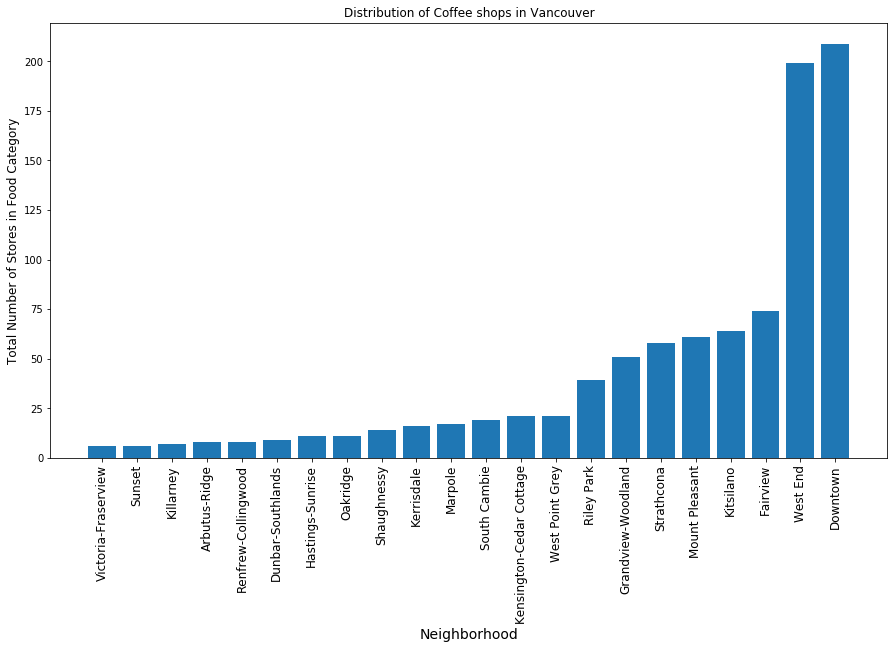

In [43]:
df_count_stores = df_neighbors.groupby('Neighborhood').count().sort_values("Name", ascending = True).reset_index()[['Neighborhood' ,'Name' ]]
df_count_stores.rename(columns = {'Name' : 'Number of Coffeshops'} , inplace = True)
#bar chart
plt.subplots(figsize=(15,8))
plt.bar(df_count_stores['Neighborhood'], df_count_stores['Number of Coffeshops'], data=df_count_stores )
plt.xticks(rotation=90 ,fontsize = 12)
plt.xlabel('Neighborhood',fontsize = 14) # add to x-label to the plot
plt.ylabel('Total Number of Stores in Food Category',fontsize = 12) # add y-label to the plot
plt.title('Distribution of Coffee shops in Vancouver') # add title to the plot

plt.show()

##### Now we need to get University and college density in Vancouver's neighborhoods by Foursquare

We are going to use College & University category id to create a similar data frame, but this time we will focus on venues and university distribution.


* 4d4b7105d754a06372d81259  College & University

In [44]:
CATEGORIES_UNI = ['4d4b7105d754a06372d81259']
df_uni = getNearbyVenues(df_vancouver['Neighborhood'],CATEGORIES_UNI , df_vancouver['Latitude'], df_vancouver['Longitude'] )
#df_uni= pd.read_csv('df_uni.csv')
#df_uni.drop('Unnamed: 0' , 1 , inplace=True)
df_uni.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Name,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,Arbutus-Ridge,49.240968,-123.167001,New Link College Vancouver,5307 West Blvd,49.238154,-123.155573,University
1,Arbutus-Ridge,49.240968,-123.167001,Little House Educational Resource Center,4895 Mackenzie st. (W. 33rd),49.242417,-123.173583,General College & University
2,Arbutus-Ridge,49.240968,-123.167001,Kerrisdale Elementary,5555 Carnarvon St,49.236140,-123.173581,College Academic Building
3,Arbutus-Ridge,49.240968,-123.167001,MindStory Coaching Academy,"Office 1601, 100-535 Thurlow Street",49.242175,-123.153455,Student Center
4,Downtown,49.283393,-123.117456,The Dirty Apron Cooking School,540 Beatty St (btwn Dunsmuir & Pender),49.280693,-123.109393,Trade School


In [45]:
with open('df_uni.csv' , 'w') :
      df_uni.to_csv('df_uni.csv')

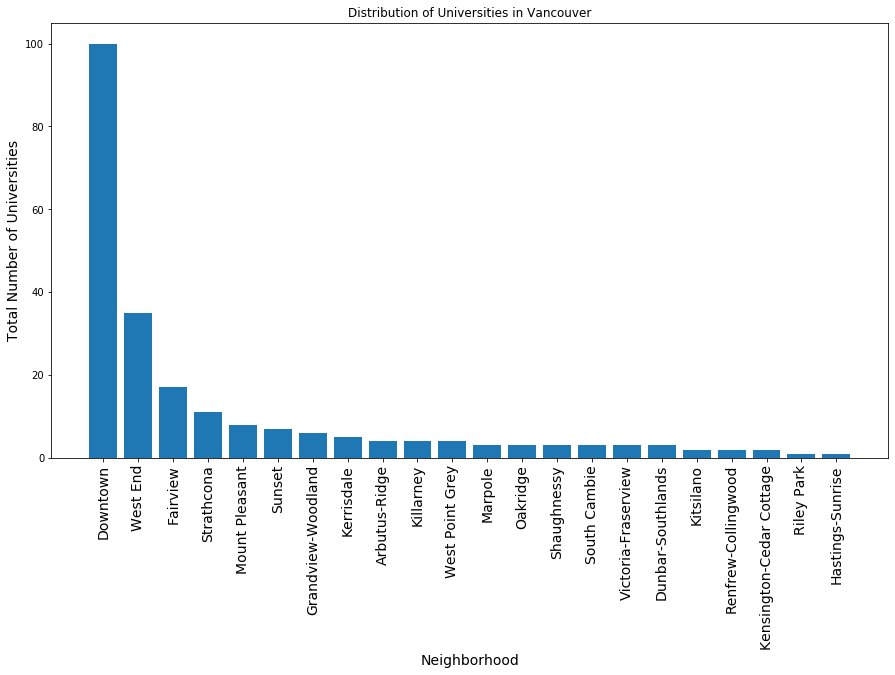

In [46]:
df_count_uni = df_uni.groupby('Neighborhood').count().sort_values("Name", ascending = False).reset_index()[['Neighborhood' ,'Name' ]]
df_count_uni.rename(columns = {'Name' : 'Universities'} , inplace = True)
#bar chart
plt.subplots(figsize=(15,8))
plt.bar(df_count_uni['Neighborhood'], df_count_uni['Universities'], data=df_count_uni )
plt.xticks(rotation=90 ,fontsize = 14)
plt.xlabel('Neighborhood',fontsize = 14) # add to x-label to the plot
plt.ylabel('Total Number of Universities',fontsize = 14) # add y-label to the plot
plt.title('Distribution of Universities in Vancouver') # add title to the plot

plt.show()

## C. Methodology

In this project, we are trying to detect the neighborhoods with a **high density** of Coffee shops and related stores. Furthermore, we are interested in areas which have the **most colleges and universities**.

Within the first step, all the **required data** has been collected such as the list of all neighbors in Vancouver with geographic information. 

Then, we utilized the **Foursquare API** to locate each neighbors coffee shops and related trades.
Next, according to returned data from Foursquare API, we did some `analysis` to figure out the `Density of Coffee shops and Colleges across all neighbors`.

In the final step of our analysis, we will use `unsupervised` learning **K-means algorithm** to cluster the boroughs. K-Means algorithm is one of the most common cluster methods of unsupervised learning.

### Analysis 

#### One Hot Encoding

Changing the shape of our data frame to have our data in numeric form and get it ready for the clustering method.

In [47]:
# one hot encoding
vancouver_onehot = pd.get_dummies(df_neighbors[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vancouver_onehot['Neighborhood'] = df_neighbors['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [vancouver_onehot.columns[-1]] + list(vancouver_onehot.columns[:-1])
vancouver_onehot = vancouver_onehot[fixed_columns]

vancouver_onehot.head()

,Neighborhood,Cafeteria,Café,Coffee Shop,College Cafeteria,Food & Drink Shop,Lounge,Tea Room
7,Downtown,0,1,0,0,0,0,0
8,Downtown,0,0,0,0,1,0,0
12,Downtown,0,0,0,0,0,1,0
16,Downtown,0,0,0,0,1,0,0
27,Downtown,0,0,0,0,1,0,0


In [49]:
vancouver_grouped = vancouver_onehot.groupby('Neighborhood').sum().reset_index()
vancouver_grouped.head()

,Neighborhood,Cafeteria,Café,Coffee Shop,College Cafeteria,Food & Drink Shop,Lounge,Tea Room
0,Arbutus-Ridge,1,2,2,0,0,0,3
1,Downtown,8,121,70,0,4,1,5
2,Dunbar-Southlands,1,6,2,0,0,0,0
3,Fairview,3,34,34,1,0,0,2
4,Grandview-Woodland,3,23,23,0,2,0,0


##### Now, let's create a data frame with both information of good neighbors due to the density of Coffee shops and Universities and Colleges.
We have `vancouver_grouped` and `df_count_uni`, So we must join them on common distinct value like `Neighborhood`

In [51]:
vancouver_grouped_uni= pd.merge(vancouver_grouped, df_count_uni , on = 'Neighborhood' , how= 'inner')
vancouver_grouped_uni.head()

,Neighborhood,Cafeteria,Café,Coffee Shop,College Cafeteria,Food & Drink Shop,Lounge,Tea Room,Universities
0,Arbutus-Ridge,1,2,2,0,0,0,3,4
1,Downtown,8,121,70,0,4,1,5,100
2,Dunbar-Southlands,1,6,2,0,0,0,0,3
3,Fairview,3,34,34,1,0,0,2,17
4,Grandview-Woodland,3,23,23,0,2,0,0,6


##### Now let's create the new dataframe and display the top venues for each neighborhood.
First, let's write a function to sort the venues in descending order.


In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [53]:
num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = vancouver_grouped_uni['Neighborhood']

for ind in np.arange(vancouver_grouped_uni.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vancouver_grouped_uni.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Arbutus-Ridge,Universities,Tea Room,Coffee Shop,Café,Cafeteria,Lounge,Food & Drink Shop,College Cafeteria
1,Downtown,Café,Universities,Coffee Shop,Cafeteria,Tea Room,Food & Drink Shop,Lounge,College Cafeteria
2,Dunbar-Southlands,Café,Universities,Coffee Shop,Cafeteria,Tea Room,Lounge,Food & Drink Shop,College Cafeteria
3,Fairview,Coffee Shop,Café,Universities,Cafeteria,Tea Room,College Cafeteria,Lounge,Food & Drink Shop
4,Grandview-Woodland,Coffee Shop,Café,Universities,Cafeteria,Food & Drink Shop,Tea Room,Lounge,College Cafeteria


#### Finding top 5 most surrounded neighbors by Universities and Colleges

In [54]:
df_count_uni.head(5)

,Neighborhood,Universities
0,Downtown,100
1,West End,35
2,Fairview,17
3,Strathcona,11
4,Mount Pleasant,8


#### Print each neighborhood along with the top 5 most common venues

In [55]:
num_top_venues = 5

for hood in vancouver_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = vancouver_grouped[vancouver_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus-Ridge----
               venue  freq
0           Tea Room   3.0
1               Café   2.0
2        Coffee Shop   2.0
3          Cafeteria   1.0
4  College Cafeteria   0.0


----Downtown----
               venue   freq
0               Café  121.0
1        Coffee Shop   70.0
2          Cafeteria    8.0
3           Tea Room    5.0
4  Food & Drink Shop    4.0


----Dunbar-Southlands----
               venue  freq
0               Café   6.0
1        Coffee Shop   2.0
2          Cafeteria   1.0
3  College Cafeteria   0.0
4  Food & Drink Shop   0.0


----Fairview----
               venue  freq
0               Café  34.0
1        Coffee Shop  34.0
2          Cafeteria   3.0
3           Tea Room   2.0
4  College Cafeteria   1.0


----Grandview-Woodland----
               venue  freq
0               Café  23.0
1        Coffee Shop  23.0
2          Cafeteria   3.0
3  Food & Drink Shop   2.0
4  College Cafeteria   0.0


----Hastings-Sunrise----
               venue  freq
0            

## Cluster Neighborhoods

First we run **Elbow Method** for finding the optimal value of k in KMeans.

Then, we run k-means by optimal K value.

`The Elbow Method is one of the most popular methods to determine this optimal value of k`.

In [56]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist

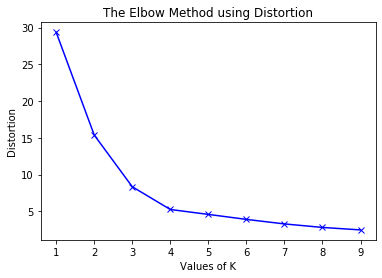

In [57]:
#refine our data to fit the model
vancouver_grouped_clustering = vancouver_grouped_uni.drop('Neighborhood', 1)


distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(vancouver_grouped_clustering) 
    #kmeanModel.fit(vancouver_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(vancouver_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / vancouver_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(vancouver_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / vancouver_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

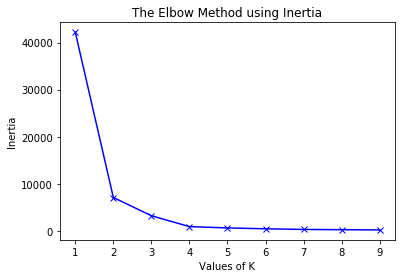

In [58]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

#### Now, we have the optimal value of K which is : **K=4**

it means, in the best condition our data should be clustered to `4 groups`.

In [59]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vancouver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 0, 2, 2, 0, 0, 0, 0, 2], dtype=int32)

In [60]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vancouver_merged = df_vancouver

# merge vancouver_grouped with vancouver data (df_vancouver) to add latitude/longitude for each neighborhood
vancouver_merged = vancouver_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
 
vancouver_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Arbutus-Ridge,49.240968,-123.167001,0,Universities,Tea Room,Coffee Shop,Café,Cafeteria,Lounge,Food & Drink Shop,College Cafeteria
1,Downtown,49.283393,-123.117456,3,Café,Universities,Coffee Shop,Cafeteria,Tea Room,Food & Drink Shop,Lounge,College Cafeteria
2,Dunbar-Southlands,49.253460,-123.185044,0,Café,Universities,Coffee Shop,Cafeteria,Tea Room,Lounge,Food & Drink Shop,College Cafeteria
3,Fairview,49.264113,-123.126835,2,Coffee Shop,Café,Universities,Cafeteria,Tea Room,College Cafeteria,Lounge,Food & Drink Shop
4,Grandview-Woodland,49.270559,-123.067942,2,Coffee Shop,Café,Universities,Cafeteria,Food & Drink Shop,Tea Room,Lounge,College Cafeteria


## D. Result and Discussion




It was demonstrated by our analysis that Vancouver has lots of Coffee Shops and social places ( more than 900 ). The total number of measurements and population densities of the 22 neighbors in total can vary. As there is such a complexity, very different approaches can be tried in clustering and classification studies. 

Furthermore, it is apparent that not every classification method can generate the same high-quality results for Vancouver city.
Until now, our analysis illustrates two neighbors `Downtown` and `West End` have the **highest density** of Coffee shops and Universities.
<br>
We chose unsupervised `K-Means` method for clustering the neighbors, and by utilizing the elbow method, the optimal K value was diagnosed as 4. 

Finally, the study has come to an end by visualizing clustered neighbors on the **Folium  map**.


In [61]:
# create map
map_clusters = folium.Map(location=[va_loc.latitude, va_loc.longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighborhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster :' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Naming each Cluster
We can also estimate the number of most common venues in each cluster. Thus, we can create a bar chart which may help us to find proper labels for each cluster.

In [62]:
cluster_lables = vancouver_merged.iloc[0:,3:].groupby('Cluster Labels').agg(lambda x: ','.join(x.unique()) )
cluster_lables.iloc[:,:3]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
Cluster Labels,,,
0,"Universities,Café,Coffee Shop","Tea Room,Universities,Coffee Shop,Café","Coffee Shop,Universities,Cafeteria,Food & Drin..."
1,Café,Coffee Shop,Universities
2,"Coffee Shop,Café","Café,Coffee Shop","Universities,Tea Room"
3,Café,Universities,Coffee Shop


We take 1 to 3rd most common venue into our consideration :


Cluster 0 : `Multiple Social Venue`    
Cluster 1 , 3 : `Coffee Shop Venue with more purity`
<br>
Cluster 2 : `More Cafe and Less University`

In [63]:
cluster_sum =pd.DataFrame(cluster_lables.iloc[:,:3].T.agg(lambda x: ','.join(x) ))
cluster_sum= cluster_sum.reset_index()
cluster_sum.rename(columns = {0 : 'summ'}, inplace = True)
cluster_sum =cluster_sum.summ.str.split(",",expand=True,)
cluster_freq =pd.DataFrame(cluster_sum.loc[0].value_counts() )
for i in np.arange(kclusters):
    cluster_freq[i] = cluster_sum.loc[i].value_counts()
    
cluster_freq=cluster_freq.fillna('0').T
cluster_freq = cluster_freq.astype(float)
cluster_freq

,Universities,Coffee Shop,Tea Room,Café,Cafeteria,Food & Drink Shop
0,3.0,3.0,2.0,2.0,1.0,1.0
1,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,2.0,1.0,2.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0


#### Visualizing Cluster's Contents in Bar Chart

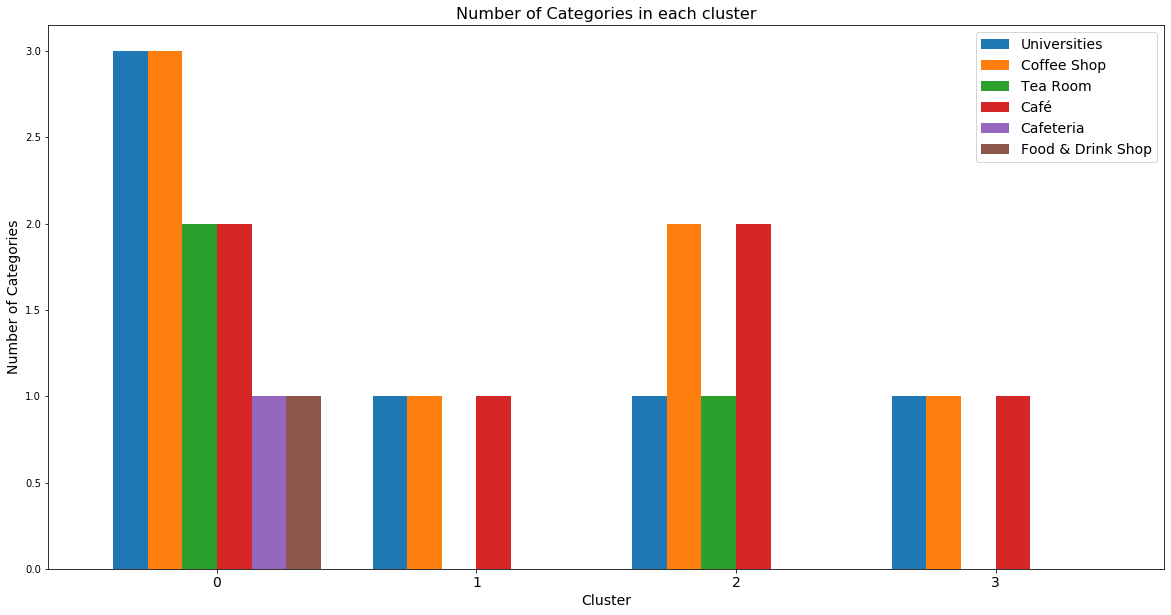

In [64]:

ax = cluster_freq.plot(kind ='bar', 
               figsize=(20,10),
               width = 0.8,
              # color=['#5cb85c' , '#5bc0de', '#d9534f' ],
               )
         

plt.title('Number of Categories in each cluster' , fontsize=16 )
plt.xlabel('Cluster' ,fontsize = 14)
plt.ylabel('Number of Categories',fontsize = 14)
plt.legend(prop={'size': 14})   
plt.xticks(rotation=0 , fontsize = 14)


plt.show()

## F. Conclusion

The objective of this project was to catalog Vancouver neighbors with the high number of Coffee Shops and Universities in order to assist investors who want to choose an optimal location for their trade. 
<br>
By measuring coffee shop and university density distribution from Foursquare API we have first identified neighbors with the highest density, 
<br>then we grouped neighbors by machine learning method and revealed some of the most important characteristics of each cluster. 

The final decision on optimal coffee shop location will be made by stakeholders based on specific characteristics of neighborhoods and provided data in this study. 
<br>Also, other interested people can achieve better outcomes and understandings by this kind of information.